## Quelques méthodes numériques pour la résolution d'une équation différentielle ordinaire

*Durée 2h à 3h*

Ce python notebook est inspiré du cours de méthodes numériques en **physique** proposé sur https://femto-physique.fr/analyse-numerique/pdf/book-analyse-numerique.pdf .  

### Objectifs
Lors de nos simulations, nous allons fréquemment avoir recours aux ***librairies numérique*** pour réaliser la résolution d'une équation différentielle. 

Le but ici est de (re)découvrir les méthodes permettant de résoudre une **équation différentielle ordinaire (EDO) d'ordre 1**. À noter que les équations différentielles ordinaires d'ordre supérieur, peuvent se ramener à la forme précédente du premier ordre.

La cinétique chimique n'est ici qu'un prétexte pour vous faire travailler des méthodes simples (qui d'ailleurs trouvent leur limites en cinétique, dans le cadre des *problèmes raides*, lorsque les constantes de vitesse diffèrent de plusieurs ordres de grandeur).

**Méthodes abordées**

* méthodes d'Euler implicite et explicite

* méthodes de Runge-Kutta

*Consigne:* Dans tous les codes rendus, vous laisserez des sorties permettant de vérifier que le code fonctionne.

### 1. Méthode d'Euler

On cherche donc une solution approchée d'une équation différentielle ordinaire du premier ordre se mettant sous la forme du **problème de Cauchy**:


$$\left\{ \begin{align} y'(t) & = f(t,y(t)) \qquad 0\leq t \leq T \\
y(0) & = y_0 
\end{align} \right. $$

où $y(t)$ est un *scalaire* ou un *vecteur* et $f(t,y(t))$ une fonction de $[0,T]\times \mathbb{R} \rightarrow \mathbb{R}$ suffisamment régulière pour que l'existence et l'unicité de la solution ne pose pas de problème.

Les deux méthodes numériques évoquées ici pour résoudre les équations différentielles sont des méthodes approximatives basées sur la ***discrétisation*** de la variable temps $t$. Le problème se ramène alors à un calcul ***itératif***, facile à programmer.

Pour effectuer le calcul numérique, l'utilisateur doit disposer:

* de la durée $T$ de la simulation numérique;

* des conditions initiales et de la fonction $f$;

* du ***pas de discrétisation*** $h$. L'intervalle $[0,T]$ est subdivisé en $N$ sous-intervalles de même longueur $h$.

La méthode numérique renvoie une liste $(y_0,y_1,...,y_N)$ contenant les valeurs approchées de $y(t_n)$ pour les différents instants $t_n = t_0 + nh$. Ces valeurs approchées sont notées $y_n$.

#### 1.a Méthode d'Euler explicite



L'équation différentielle peut s'intégrer comme suit:

\begin{equation}
(1)\qquad y(t_{n+1})=y(t_n) + \int_{t_n}^{t_{n+1}} f(t,y(t)) dt
\end{equation}

L'intégrale peut s'approcher par la méthode des rectangles à gauche, comme indiqué sur la figure ci-dessous:


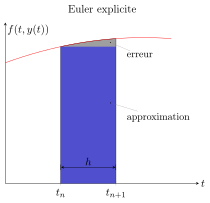

In [17]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo,IFrame,HTML
SVG(filename='./fig/rectangle_gauche.svg')

$$(2) \qquad \int_{t_n}^{t_{n+1}} f(t,y(t)) dt \simeq h\times f(t_n,y(t_n))$$

d'où le **schéma itératif** suivant:

\begin{align} y_{n+1} & = y_{n} + h\, f(t_n,y_n)  \\
y(0) & = y_0 
\end{align}

Graphiquement, on voit que cette méthode sous-estime (sur-estime) l'aire lorsque la fonction $f$ croît (décroît) au cours du temps.
L'erreur produite correspond à l'aire grisée, de forme quasi triangulaire et de surface $h\times ph$ où $p$ est la pente de $f$ à l'instant $t_n$. L'erreur de la méthode d'Euler explicite, liée à l'algorithme, vaut donc à peu près:

$$e_{E} \simeq \frac{1}{2} p h^2 $$

Après $N$ itérations, on commet une erreur globale de l'ordre de $N\frac{ph^2}{2} = \frac{1}{2} T p h$ où $T$ est la durée totale. Pour une durée donnée $T$, l'erreur globale augmente linéairement avec le pas $h$ : on dit que la méthode d'Euler est d'ordre 1 (cf. point 3. compléments si vous avez le temps de faire cette partie).

#### Algorithme de la méthode d'Euler explicite
* Définir la fonction $f(t,y)$
* Initialiser le pas $h$ et la durée $T$
* Initialiser les conditions initiales: $t=0$ et $y_0 = y(0)$
* Tant que $t \leq T$ faire:

    a. Calcul de $k_1 = f(t,y)$
    
    b. $y = y + h \times k_1$ et $t = t+h$
    
    c. Stocker le point

#### Q1a.Travail à réaliser sur la méthode d'Euler explicite

**a.** On considère l'acte élémentaire suivant (par exemple une recombinaison de radicaux de type $2\, {CH_3}^\circ \rightarrow C_2 H_6$):

$$2\, A \xrightarrow[ ]{k} B$$

On note $x(t)$ l'avancement molaire volumique et $[A]_0 = a$ la concentration intiale en $A$. 

Ecrire ci-dessous l'équation différentielle statisfaite par $x$, puis écrire le problème de Cauchy correspondant.

*Consigne:* utiliser le langage LateX (balises ouvrantes et fermantes = $$, documentation sur la syntaxe Latex: https://fr.wikibooks.org/wiki/LaTeX/) 

$$\frac{dx}{dt} = k (a-2\, x)^2 $$
$$ x(0)= 0$$

Ici, la fonction $f$ est: $f: t,x(t) \rightarrow k(a-x(t))^2$


*b.* Écrire une fonction `euler_explicit(f,y0,t0,tn,n)` qui pour une donnée initiale `y0` (qui pour l'instant est un scalaire), d'un intervalle de temps borné par `t0 < tn` et un nombre de pas `n > 0` retourne sous forme de liste les valeurs $y_0, y_1, \dots, y_N$ calculées avec la méthode d'Euler explicite aux temps $t_0,t_1, \dots, t_N$ représentés par le vecteur `t`, lui aussi retourné par la méthode sous forme de liste.

*c.* Utiliser cette fonction pour résoudre une EDO simple: $y'(t) = y(t)$ avec $y_0 = 1$ sur l'intervalle de votre choix. On représentera graphiquement la solution obtenue.

Essayez de mettre en évidence l'écart entre solution réelle et solution numérique de votre équation différentielle, notamment en faisant varier le pas $h$.

*d.* Résolvez le problème cinétique posé, avec $a=0.1\ M$ et $k = 0.01 M^{-1}.s^{-1}$. Pour choisir pas et intervalle, vous avez intérêt à estimer le temps de demi-réaction.

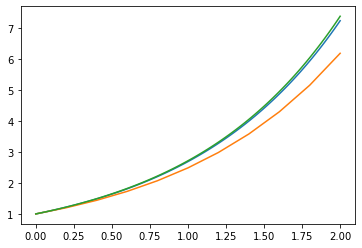

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#matplotlib inline = commande pour affichage du graphe dans ce python notebook

def f(t,y): #definition du problème de Cauchy
    return y

def euler_explicit(f,y0,t0,tn,n):
    #args eq diff,  cond intiale, tinit, tfin, nbre pas
    h = (tn-t0)/n #calcul du pas
    y = [y0]
    t = [t0]
    ya = y0 
    ta = t0
    for i in range(n):
        ya = ya + h * f(t,ya) #yn+1=yn + h*f(t,yn)
        ta = ta + h
        y.append(ya)
        t.append(ta)
    return t,y

#resolution par méthode d'Euler
t,y = euler_explicit(f,1,0,2,100)
plt.plot(t,y)
t1,y1 = euler_explicit(f,1,0,2,10)
plt.plot(t1,y1)

#tracé de la solution analytique: y(t) = exp(t)
tech = np.linspace(0,2,100)
plt.plot(tech,np.exp(tech))



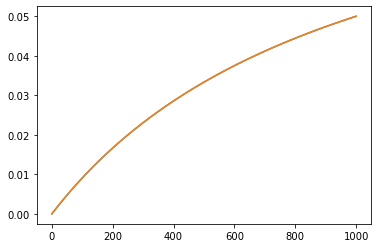

In [19]:
#cas de l'équation cinétique proposée: 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def h(t,y,a,k): #definition de l'équation différentielle avec en argument [A]0 et k
    return k*(a-y)**2


#resolution par méthode d'Euler
t,y = euler_explicit(lambda t,y: h(t,y,0.1,0.01),0,0,1000,10000)
plt.plot(t,y)

#tracé de la solution analytique: 1/(a-y)-1/a = k*t soit y(t)=a*kat/(1+kat)
tech = np.linspace(0,1000)
def h(t):
    return 0.1*0.001*t/(1+0.001*t)
hech = h(tech)
plt.plot(tech,hech)


#### 1.b Méthode d'Euler implicite ou Euler rétrograde

On peut également approcher la valeur de l'intégrale $(1)$ par la méthode des rectangles à droite, c'est à dire.

$$(3) \qquad \int_{t_n}^{t_{n+1}} f(t,y(t)) dt \simeq h\times f(t_{n+1},y(t_{n+1}))$$

avec le schéma itératif suivant:

$$\left\{ \begin{align} 
y_{n+1} & = y_{n} + h\, f(t_{n+1},y_{n+1})  \\
y(0) & = y_0 
\end{align} \right.$$

Le terme $y_{n+1}$ est présent dans le terme de gauche et celui de droite.
Contrairement à la méthode d'Euler explicite, la grandeur recherchée $y_{n+1}$ est reliée à une fonction qui dépend de cette même grandeur. Autrement dit, $y_{n+1}$ est défini *implicitement* d'où le nom de la méthode.

Le calcul de $y_{n+1}$ doit être réalisé à chaque pas, en calculant le zéro  de la fonction: $F: y \rightarrow  y_n + h  f(t_{n+1},y) - y$ puisqu'on aura $F(y_{n+1})=0$ ce qui assure que $y_{n+1}  = y_{n} + h\, f(t_{n+1},y_{n+1})$.


Cette méthode, comme on le voit graphiquement ci-dessous, produit une erreur opposée à celle de la méthode d'Euler explicite. Elle apporte une complication dans la résolution de l'équation $(3)$, car l'équation implicite doit être résolue à chaque étape ce qui demande l'emploi d'un **algorithme annexe** (dichotomie, algorithme de Newton, ...). 

Les méthodes implicites sont en général plus stables que les méthodes explicites.


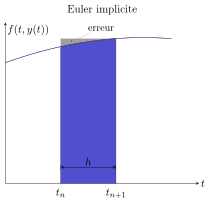

In [20]:
SVG(filename='./fig/rectangle_droite.svg')

#### Algorithme de Newton

L'algorithme de Newton est une méthode **itérative** de recherche de racine pour une équation $f(x) = 0$, à partir d'une estimation $x_0$ ce cette racine.

On considère une approximation de la fonction $f$ en considérant son développement de Taylor au premier ordre, c'est-à-dire qu'on assimile la fonction à sa tangente en ce point $x_0$:
$$ f(x) \simeq f(x_0) + f'(x_0)  (x-x_0) $$

On cherche le zéro de cette fonction qui approxime $f$. Soit $x_1$ ce zéro:

$$ 0 = f(x_0) + f'(x_0)  (x_1-x_0) $$

$$ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} $$

Ainsi, par *récurrence*:

$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} $$

Le critère d'arrêt est déterminé relativement à une grandeur numériquement considérée comme négligeable:

$$ || f(x_k) || < \epsilon_1 \qquad ou \qquad || x_{k+1} - x_{k} ||< \epsilon_2$$

avec $\epsilon_1,\epsilon_2 \in \mathbb{R}^+$.

**RQ:** Il se peut que l'algorithme s'arrête, si $x_k$ est en dehors du domaine de définition de la fonction. Il est également possible que le critère d'arrêt soit vérifié pour des points ne correspondant pas à l'équation à résoudre


In [21]:
url = 'https://upload.wikimedia.org/wikipedia/commons/8/83/Methode_newton.png'
IFrame(url, width=600, height=200)

#### Q1b. Travail à réaliser sur la méthode d'Euler explicite

*a* Coder une fonction `newton(f,dfdy,yi,eps)` qui prend en argument deux fonctions, `f`et sa dérivée première `dfdy`, ainsi qu'un point de départ `yi` et un critère de convergence `eps` s'appliquant sur $|| y_{k+1} - y_{k} ||$.

Vérifier le bon fonctionnement sur la fonction $f: y \rightarrow y^2 -1$.

In [22]:
#algo de newton 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def f(y):
    return y**2 - 1

def dfdy(y):
    return 2*y

def newton(f,dfdy,y0,eps):
    y1 = y0 - f(y0)/dfdy(y0) #premier pas
    while(np.abs(y1-y0) > eps):
        y0 = y1 
        y1 = y0 - f(y0)/dfdy(y0)
    return y0

print(newton(f,dfdy,0.5,1e-4))

1.0000000464611474


*b* Utilisation d'une différence finie progressive

Si l'on ne peut donner l'expression de la fonction `dfdy`, le problème devient plus complexe. Toutefois, la dérivée peut s'approximer comme une différence finie progressive:

$$f'(y_n) \simeq \frac{f(y_{n+1})-f(y_n)}{y_{n+1}-y_n}$$

Coder maintenant une fonction `newton(f,yi,eps)` qui prend en argument une fonction, `f`, ainsi qu'un point de départ `yi` et un critère de convergence `eps` s'appliquant sur $|| y_{n+1} - y_{n} ||$.


Vérifier le bon fonctionnement sur la fonction $f: y \rightarrow y^2 -1$. On pourra vérifier qualitativement que l'erreur est plus grande que dans le cas précédent, en lien avec  l'utilisation de cette différence finie.

In [23]:
#algo de newton 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def f(y):
    return y**2 - 2

def newton(f,y0,eps):
    y1 = y0 +2 * eps #premier pas
    while(np.abs(y1-y0) > eps):
        df = (f(y1)-f(y0))/(y1-y0)
        y0 = y1 
        y1 = y0 - f(y0)/df
    return y0

print(newton(f,0.5,1e-4))

1.414213049603234


*c* Écrire une fonction `euler_implicit(f,y0,t0,tn,n)` qui pour une donnée initiale `y0` (qui pour l'instant est un scalaire), d'un intervalle de temps borné par `t0 < tn` et un nombre de pas `n > 0` retourne sous forme de liste les valeurs $y_0, y_1, \dots, y_N$ calculées avec la méthode d'Euler explicite aux temps $t_0,t_1, \dots, t_N$ représentés par le vecteur `t`, lui aussi retourné par la méthode sous forme de liste.

Utiliser cette fonction pour résoudre: $y'(t) = y(t)$ avec $y_0 = 1$ sur l'intervalle de votre choix. On représentera graphiquement la solution obtenue.

**Algorithme de la méthode d'Euler implicite**

* Définir la fonction $f(t,y)$ relative au problème de Cauchy étudié
* Initialiser le pas $h$ et la durée $T$
* Initialiser les conditions initiales: $t=0$ et $y_0 = y(0)$
* Tant que $t \leq T$ faire:

    a. Calcul de $y_{n+1}$, zéro de $F: y \rightarrow yn + h* f(t+h,y) - y$

    b. Calcul de $k_1 = f(t+h,y_{n+1})$
    
    c. $y = y + h \times k_1$ et $t = t+h$
    
    d. Stocker le point

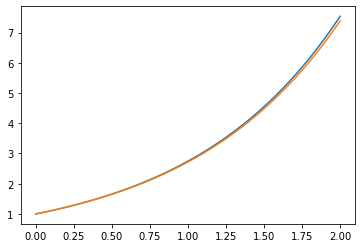

In [24]:
#algo Euler implicite

def f(t,y): #definition du problème de Cauchy
    return y

def F(f,t,y,yn,h): #definition de la fonction dont le zéro donne yn+1
    return (yn + h*f(t+h,y) - y)

def euler_implicit(f,y0,t0,tn,n):
    #args eq diff,  cond intiale, tinit, tfin, nbre pas
    h = (tn-t0)/n #calcul du pas
    y = [y0] #initialisation de la liste des valeurs de y
    t = [t0] #intialisation de la liste des valeurs de t
    ya = y0 
    ta = t0
    eps = 0.0001
    for i in range(n):
        yb = newton(lambda y: F(f,ta,y,ya,h),ya,eps)
        #print("valeur",yb)
        k1 = f(ta+h,yb)
        ya = ya + h * k1 #yn+1=yn + h*f(tn+1,yn+1)
        ta = ta + h
        y.append(ya)
        t.append(ta)
    return t,y

#resolution par méthode d'Euler
t,y = euler_implicit(f,1,0,2,100)
plt.plot(t,y)

#tracé de la solution analytique: y(t) = exp(t)
tech = np.linspace(0,2,100)
plt.plot(tech,np.exp(tech))

*d* Si vous avez fait le test pour la résolution du problème de Cauchy suivant avec la méthode d'Euler explicite, essayez les mêmes tests avec la méthode d'Euler implicite.

$$\left\{ \begin{align} y'(t) + y(t) & = 1 \qquad 0\leq t \leq T \\
y(0) & = 0 
\end{align} \right. $$

Que remarque-t-on?

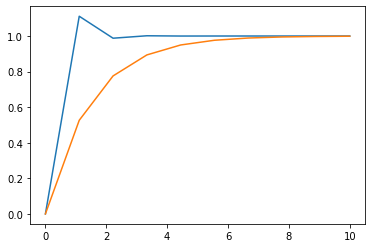

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def g(t,y): #definition du problème de Cauchy
    return -150*y+30

def m(t,y): #definition du problème de Cauchy
    return 1-y



def euler_explicit(f,y0,t0,tn,n):
    #args eq diff,  cond initiale, tinit, tfin, nbre pas
    h = (tn-t0)/n #calcul du pas
    y = [y0]
    t = [t0]
    ya = y0 
    ta = t0
    for i in range(n):
        ya = ya + h * f(t,ya) #yn+1=yn + h*f(t,yn)
        ta = ta + h
        y.append(ya)
        t.append(ta)
    return t,y

#resolution par méthode d'Euler
#t1,y1 = euler_explicit(g,0.2,0,0.1,100)
#plt.plot(t1,y1)


t2,y2 = euler_explicit(m,0,0,10,9)
plt.plot(t2,y2)


t3,y3 = euler_implicit(m,0,0,10,9)
plt.plot(t3,y3)


### 2. Méthode de Runge-Kutta 2

L'algorithme de RK2 est de nouveau une méthode à un pas. Le but est toujours de résoudre l'équation différentielle ordinaire du type:

$$\left\{ \begin{align} y'(t) & = f(t,y(t)) \qquad 0\leq t \leq T \\
y(0) & = y_0 
\end{align} \right. $$

Notez que $y(t)$ peut être un scalaire ou un vecteur (ce qui permet de traiter le cas d'équations différentielle d'ordre deux ou encore des systèmes d'équations différentielles (vu plus loin)). 

On note toujours $h$ le pas en temps et $y_n$ la valeur approchée de $y(t_n)$ aux instants $t_n = n\, h$.

En intégrant l'équation différentielle entre $t_n$ et $t_{n+1}$, on a:


\begin{equation}
(1)\qquad y(t_{n+1})-y(t_n) = \int_{t_n}^{t_{n+1}} f(t,y(t)) dt
\end{equation} 

On souhaite approcher cette intégrale de façon plus précise que ne le fait la **méthode d'Euler**.

#### Runge-Kutta d'ordre 2 (RK 2)

On peut améliorer l'estimation de l'intégrale en calculant l'**aire d'un trapèze** plutôt que celle d'un rectangle. L'intégrale est assimilée à l'aire du trapèze ((petite base + grande base)* hauteur/2) correspondant:

\begin{equation}
(2)\qquad \int_{a}^{b} f(x)\, dx \simeq \frac{b-a}{2} [ f(a) + f(b) ]
\end{equation} 

À partir de (1) on obtient l'approximation:

\begin{equation}
(3)\qquad \int_{t_n}^{t_{n+1}} f(t,y(t)) dt \simeq \frac{h}{2} [f(t_n,y(t_n))+ f(t_{n+1},y(t_{n+1}))]
\end{equation} 



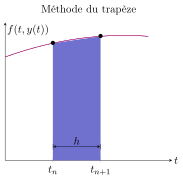

In [26]:
from IPython.display import IFrame,HTML

SVG(filename='./fig/trapeze.svg')


L'intégrale dépend donc ici de $y_n$ et $y_{n+1}$, ce qui est une relation *implicite*. Pour contourner cette complication, on utilise la **méthode d'Euler explicite** pour estimer la valeur $y_{n+1}$ du terme $f(t_{n+1},y(t_{n+1}))$. On obtient alors le schéma itératif suivant:

\begin{equation}
(4)\qquad y_{n+1} = y_n + h ( \frac{k_1}{2} + \frac{k_2}{2} ) 
\end{equation} 

avec

\begin{align} k_1 & = f(t_n,y_n) \\
k_2 & = f(t_n+h,y_n + h k_1) \\
y_0 & = y(0) 
\end{align}

#### Algorithme pour RK 2

* Définition de la fonction $f(t,y)$
* Initialisation du pas $h$, de la durée $T$
* Initialisation des conditions initiales: $t=0$ et $y_0 = y(0)$
* Tant que $t \leq T$ faire:

    a. Calcul de $k_1 = f(t,y) $
    
    b. Calcul de $k_2 = f(t + h,y+ h k_1) $
    
    c. Incrémenter les valeurs: $y = y + \frac{h}{2} (k_1 + k_2) $; $t=t+h$
    
    d. Stocker les valeurs
    

#### Erreur avec la méthode RK 2

Ce schéma numérique présente deux erreurs de troncature. 
Tout d'abord, l'approximation de l'intégrale par l'aire d'un trapèze produit une première erreur $e_1$. La méthode du trapèze neutralise l'erreur de la méthode d'Euler. $e_1$ est liée à la courbure de la fonction et non à sa pente: $e_1$ varie comme $h^3$ (et non $h^2$ comme dans la méthode d'Euler). 

On commet une deuxième erreur $e_2$ lors de l'estimation de $y_{n+1}$ par $y_n+ hf(t_n,y_n)$ dans le calcul de $f(t_{n+1},y_{n+1})$. On peut montrer par propagation d'erreur que:

$$ e_2 = \frac{h}{2}\times \frac{\partial f}{\partial y} \times e_E $$

où l'erreur par méthode d'Euler explicite est (cf. ci-dessus): $e_{E} \simeq \frac{1}{2} p h^2 $

L'erreur produite à chaque étape peut s'écrire sous la forme:

$$ e_{RK2} = e_1 + e_2 = Cste\, h^3$$

Pour une durée $T$, l'erreur totale varie donc en $h^2$: la méthode est d'**ordre 2** comme l'indique son nom.


#### Q2.Travail à réaliser sur la méthode RK 2

a. Vous avez déjà implémenté la fonction `euler_explicit(f,y0,t0,tn,n)` qui donné une fonction $f$, une condition initiale `y_0`, un intervalle de temps défini par `t0` à `tn` et un nombre de pas retourne et une condition initiale $y_0$ retourne sous forme de liste `y` les valeurs $y_0, y_1, \dots, y_N$ calculées avec la méthode d'Euler explicite aux temps $t_0,t_1, \dots, t_N$ représentés par le vecteur `t`, lui aussi retourné par la méthode sous forme de liste.

Implémenter en vous inspirant de ce qui a été fait une fonction `rk2(f,y0,t0,tn,n)` qui retournera sous forme de liste `y` les valeurs $y_0, y_1, \dots, y_N$ calculées avec la méthode d'Euler explicite aux temps $t_0,t_1, \dots, t_N$ représentés par le vecteur `t`, lui aussi retourné par la méthode sous forme de liste.

b. Résoudre par exemple l'équation différentielle test $y'(t) = y(t)$ avec $y_0 = 1$ sur l'intervalle de votre choix. On représentera grphiquement la solution obtenue. Comparer graphiquement le résultat à celui de la méthode d'Euler explicite.

c. Puis résoudre le problème cinétique de la question Q1.

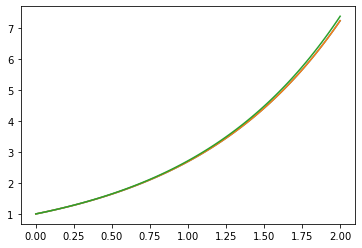

In [27]:
#cas de l'équation cinétique proposée: 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def f(t,y):
    return y

def rk2(f,y0,t0,tn,n):
    h = (tn-t0)/n
    y = [y0] 
    t = [t0]
    ya = y0
    ta = t0
    for i in range(n):
        k1 = f(ta,ya)
        k2 = f(ta+h,ya+h*k1)
        ya = ya + h *(k1+k1)/2
        ta = ta + h
        t.append(ta)
        y.append(ya)
    return t,y
        

#comparaison resolution par méthode d'Euler/rk2
t,y = rk2(f,1,0,2,100)
plt.plot(t,y)
t1,y1 = euler_explicit(f,1,0,2,100)
plt.plot(t1,y1)

#tracé de la solution analytique: y(t) = exp(t)
tech = np.linspace(0,2,100)
plt.plot(tech,np.exp(tech))
      
        
    

### 3. Erreur, Ordre, Stabilité des méthodes numériques (partie optionnelle)

Lire le docuemnt

Exemple résolution du système.

$$\left\{ \begin{align} y'(t) + y(t) & = 1 \qquad 0\leq t \leq T \\
y(0) & = 0 
\end{align} \right. $$

Tester différents pas: $0\leq h \leq 1$ puis $h> 1$.

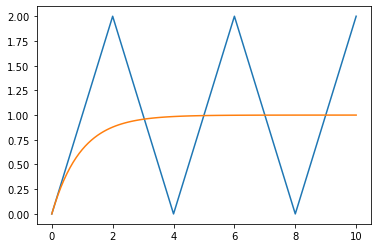

In [30]:
def m(t,y): 
    return 1-y


#resolution par méthode d'Euler
t,y = euler_explicit(m,0,0,10,5) #arguments: f,y0,t0,tn,n
plt.plot(t,y)

tx,yx = euler_explicit(m,0,0,10,100) #arguments: f,y0,t0,tn,n
plt.plot(tx,yx)
